In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digets 0-9

# training and validation set
(x_train,y_train),(x_val, y_val) = mnist.load_data()

# normalizeer data 
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_val = tf.keras.utils.normalize(x_val,axis=1)

#build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

# Choose amount of neurons in layer
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# choose optimizers
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 89us/step - loss: 0.3130 - acc: 0.9087
Epoch 2/3
60000/60000 [==============================] - 5s 76us/step - loss: 0.1364 - acc: 0.9585
Epoch 3/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.0967 - acc: 0.9706


In [4]:
# Performance on validation 
val_acc = model.evaluate(x_val,y_val)
print('Model accuracy = {}\nModel loss = {}'.format(val_acc[1], val_acc[0]))

10000/10000 [==============================] - 0s 45us/step
Model accuracy = 0.9646
Model loss = 0.1125761763293296


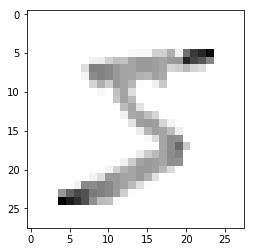

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
import matplotlib.pyplot as plt

# Plot grayscale of an image
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

# numpy array of an image
print(x_train[0]) 

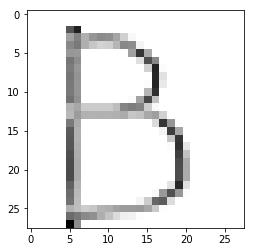

Prediction: 3


In [18]:
from PIL import Image
import numpy as np

# open image
im = Image.open('b.png','r')
pix_val = np.array(im.getdata())
# width,height = im.size
    
# construct a new (greyscaled) array of the image 
newlist = []
for i in range(0,len(pix_val),28):
    row = []
    for j in pix_val[i:i+28]:
        row.append(abs(255 - np.average(j)))
    newlist.append(row)
np.array(newlist)

# normalize image data
normpix = tf.keras.utils.normalize(newlist,axis=1)

# plot the greyscaled image
plt.imshow(normpix,cmap = plt.cm.binary)
plt.show()

# prediction for a greyscaled 
pred_sing = model.predict(img)
print('Prediction: {}'.format(np.argmax(pred_sing)))

Image dimensions: (1, 28, 28)


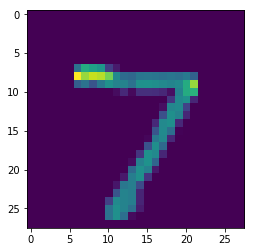

Prediction: 7


In [23]:
# image array shape
img = (np.expand_dims(normpix,0))
print('Image dimensions: {}'.format(img.shape))

# first validation image
plt.imshow(x_val[0])
plt.show()

# prediction for first validation image
predictions = model.predict(x_val)
print('Prediction: {}'.format(np.argmax(predictions[0])))